In [1]:
import matplotlib.pyplot as plt
import qutip as qt
import numpy as np
import time

In [2]:
import cmath

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [4]:
start_time = time.time()
t = np.linspace(0.0,50.0,1000)

In [5]:
def Bx(B0,theta1):
    Bx1     = B0*np.sin(theta1);
    return Bx1

def Bz(B0,theta1):
    Bz1   = B0*np.cos(theta1);
    return Bz1

In [6]:
def H_ST(gamma, Az, B0 , theta1):
    Bxx = Bx(B0,theta1)
    Bzz = Bz(B0,theta1)
    H = qt.Qobj(np.matrix([[0 ,Az                    , 0                     , 0                   ]
                          ,[Az, 0                    , np.sqrt(2)*gamma*Bxx  , np.sqrt(2)*gamma*Bxx]
                          ,[0 , np.sqrt(2)*gamma*Bxx , -2*gamma*Bzz - Az     , 0                   ] 
                          ,[0 , np.sqrt(2)*gamma*Bxx , 0                     , 2*gamma*Bzz + Az    ] ]))
    return H

In [7]:
def H(gamma, Az, B0 , theta1):
    Bxx = Bx(B0,theta1)
    Bzz = Bz(B0,theta1)
    H = qt.Qobj(np.matrix([[2*gamma*Bzz+Az      , gamma*Bxx  , gamma*Bxx    , 0                ]
                      ,[gamma*Bxx               , Az         , 0            , gamma*Bxx        ]
                      ,[gamma*Bxx               , 0          , -Az          , gamma*Bxx        ] 
                      ,[0                       , gamma*Bxx  , gamma*Bxx    , -2*gamma*Bzz - Az] ]))
    return H

In [8]:
ro = [] # Lista donde se guardaran las matrices de densidad

In [9]:
uno    = qt.basis(4,0);  
dos    = qt.basis(4,1); 
tres   = qt.basis(4,2);  
cuatro = qt.basis(4,3);  

In [10]:
s_Up        = uno;    
tcero_Up    = dos;    
tmas_Up     = tres;   
tmenos_Up   = cuatro; 

In [11]:
#s_Up        = (1/np.sqrt(2))*(dos - tres); 
#tcero_Up    = (1/np.sqrt(2))*(dos + tres);   
#tmas_Up     = uno;                           
#tmenos_Up   = cuatro;                        

In [12]:
rho0 = s_Up*(s_Up.dag())

In [13]:
anglelist = np.linspace(0,1.7,100)

In [14]:
options = qt.Options(nsteps=10000, atol=1e-7 )

In [15]:
gamma2 = 1.0
B02    = 47.0
Az2    = 172.77
Brf2   = 0.0 #15

In [16]:
for theta1 in anglelist:
        H0= H_ST(gamma2,Az2,B02,theta1) 
        output3 = qt.mesolve(H0, rho0, t, [], options = options)
        ro.append(output3.states)   

In [17]:
Id = qt.qeye(4) # Operdaor identidad
Id

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

In [18]:
sx = qt.sigmax() 
sy = qt.sigmay()
sz = qt.sigmaz()

$S_{i} = \sigma_{iA} \otimes I_{B} $

In [19]:
SX = qt.tensor(sx,qt.qeye(2))
SY = qt.tensor(sy,qt.qeye(2))
SZ = qt.tensor(sz,qt.qeye(2))

## Skew Information ##

\begin{equation}
U_{A}(\rho_{AB}) = 1 -  \lambda_{max}(W_{AB})
\label{equation:skew_minimizacion_2}
\end{equation}

\begin{equation}
\begin{aligned}
    (W_{AB})_{ij}  =  Tr \Big[ \sqrt{\rho_{AB}} (\sigma_{iA} \otimes I_{B} )\sqrt{\rho_{AB}}  (\sigma_{jA} \otimes I_{B} ) \Big]
\end{aligned}
\label{equation:matri_W_skew_minimizacion_2}
\end{equation}

In [20]:
def CalcularSkew(Plist,ro,numGuardar1):
        Skew = [] # Lista donde se guardaran la informacion de skew de cada matriz de densidad  
        for ii in range(0,len(Plist)):
                evals11, ekets11 =ro[ii][numGuardar1].eigenstates()  # Obtener los eigenestados de la matriz de densidad ro[p]
                SX_base_rho = (SX.transform(ekets11))   # Hacer el cambio de base de Sx a la base de la matriz de densidad
                SY_base_rho = (SY.transform(ekets11))   # Hacer el cambio de base de Sy a la base de la matriz de densidad
                SZ_base_rho = (SZ.transform(ekets11))   # Hacer el cambio de base de Sz a la base de la matriz de densidad
                roDiagonal = (ro[ii][numGuardar1].transform(ekets11))# Diagonalizar la matriz de densidad
                roDiagonalRaiz = qt.Qobj(np.sqrt(roDiagonal))# Obtener la razi de la matriz de densidad diagonalizada 
                g = [] # Lista donde se guardaran los elementos de la matriz W
                SigmasBaseRho = [SX_base_rho, SY_base_rho, SZ_base_rho] # Lista de los operadores Sx,Sy,Sz
                for i in range(0,3):
                    for j in range(0,3):  
                        A = roDiagonalRaiz*(qt.Qobj(SigmasBaseRho[i].data.toarray(),dims=[[4],[4]])) # \sqrt{\rho_{AB}} (\sigma_{iA} \otimes I_{B} )
                        B = roDiagonalRaiz*(qt.Qobj(SigmasBaseRho[j].data.toarray(),dims=[[4],[4]]))  # \sqrt{\rho_{AB}}  (\sigma_{jA} \otimes I_{B} )
                        AB = A*B 
                        g.append( AB.tr() )  # Elemento de la matriz ij
                Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2] ] # Construir la matriz W 
                                                ,[g[3]  , g[4]  , g[5] ]
                                                ,[g[6]  , g[7]  , g[8] ]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates() #Obtener los eigenestados de la matriz W
                Skew.append(1-np.amax(evals1)) # Obtener la informacion de Skew
        return Skew 

## Fisher Information ##

\begin{equation}
IP(\rho_{AB}) =  \frac{1}{4} \underset{H^{A}}{min} F(\rho_{AB}, K_{A}),
\label{equation:IP_definicion}
\end{equation}

\begin{equation}
IP(\rho_{AB})=\lambda_{min}(W),
\end{equation}

\begin{equation}
\begin{aligned}
    (W)_{mn}  = \frac{1}{2} \sum_{i,j} \frac{(\lambda_{i} - \lambda_{j})^2}{\lambda_{i}+\lambda_{j}} < \psi_{i} | \sigma_{m,A}  \otimes I_{B} | \psi_{j} > < \psi_{j} |  \sigma_{n,A}  \otimes I_{B} | \psi_{i}> 
    \end{aligned}
\end{equation}

In [21]:
def Calcular_elemento(SigmasBaseRho,evals,label1,label2):
    g=[] # Lista donde se guardara los elementos para calcular el elmento de matriz W[label1.label2]  
    for i in range(0,4):
        for j in range(0,4):
            if i==j:
                g.append(0)                         
            elif (evals[i]+evals[j]) < 0.0000000000000000001: 
                g.append(0) # Si el denominador de la formula para obtener la elemento W[label1.label2] es cercana a cero, el elemnento guardado sera cero  
            else:
                g.append( (((evals[i]-evals[j])**2)/(evals[i]+evals[j]))*(SigmasBaseRho[label1][i,j]*SigmasBaseRho[label2][j,i] )) # Calcula el elemento de matriz W[label1.label2]                 
    return g

In [22]:
def CalcularFisherUp(Plist,ro,numGuardar1):
        Fisher= [] #Lista donde se guardara la informacion de Fisher para cada matriz de densidad
        for ii in range(0,len(Plist)):
                evals11, ekets11 =ro[ii][numGuardar1].eigenstates() # Obtener los eigenestados de la matriz de densidad ro[p]
                SX_base_rho = (SX.transform(ekets11))  # Hacer el cambio de base de Sx a la base de la matriz de densidad
                SY_base_rho = (SY.transform(ekets11))  # Hacer el cambio de base de Sy a la base de la matriz de densidad
                SZ_base_rho = (SZ.transform(ekets11))  # Hacer el cambio de base de Sz a la base de la matriz de densidad
                SigmasBaseRho = [SX_base_rho, SY_base_rho, SZ_base_rho] # Lista de los operadores Sx,Sy,Sz
                g11=[] #Lista donde se guardara los valores para obtener el elemento de matriz W11
                g12=[] # "                                                                "  W12
                g13=[]
                g21=[]
                g22=[]
                g23=[]
                g31=[]
                g32=[]
                g33=[]
                g11 = Calcular_elemento(SigmasBaseRho,evals11,0,0) # Calcula los valores para obtener el elemento W11
                g12 = Calcular_elemento(SigmasBaseRho,evals11,0,1) # Calcula los valores para obtener el elemento W12
                g13 = Calcular_elemento(SigmasBaseRho,evals11,0,2) # Calcula los valores para obtener el elemento W13
                g21 = Calcular_elemento(SigmasBaseRho,evals11,1,0) # "                                           " W21
                g22 = Calcular_elemento(SigmasBaseRho,evals11,1,1) # "                                           " W22
                g23 = Calcular_elemento(SigmasBaseRho,evals11,1,2) # "                                           " W23
                g31 = Calcular_elemento(SigmasBaseRho,evals11,2,0) # "                                           " W31
                g32 = Calcular_elemento(SigmasBaseRho,evals11,2,1) # "                                           " W32
                g33 = Calcular_elemento(SigmasBaseRho,evals11,2,2)# "                                            " W33
                W11 = np.sum(g11)/2 # Se hace la suma para obtener el elmento de matirz W11           
                W12 = np.sum(g12)/2 # "                                             " W12           
                W13 = np.sum(g13)/2 # "                                             " W13  
                W21 = np.sum(g21)/2 # "                                             " W21            
                W22 = np.sum(g22)/2 # "                                             " W22           
                W23 = np.sum(g23)/2 # "                                             " W23           
                W31 = np.sum(g31)/2 # "                                             " W31
                W32 = np.sum(g32)/2 # "                                             " W32
                W33 = np.sum(g33)/2 # "                                             " W33
                Matriz_W_A1 = qt.Qobj(np.matrix([[W11  , W12  , W13 ] # Construir la matriz W 
                                                ,[W21  , W22  , W23 ]
                                                ,[W31  , W32  , W33 ]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates() #Obtener los eigenestados de la matriz W
                Fisher.append(np.amin(evals1))  # Obtener la informacion de Fisher
        return Fisher

In [23]:
Skew1_up = []; Skew2_up = []; Skew3_up = []; Skew4_up = []; Skew5_up = []; Skew6_up = []; Skew7_up = [];  Skew8_up = [];  Skew9_up = [];

In [24]:
Skew1_up= CalcularSkew(anglelist,ro,499)
Sk1_up = np.array(Skew1_up)
##########################################
Skew6_up= CalcularSkew(anglelist,ro,175)
Sk6_up = np.array(Skew6_up)
###########################################
Skew8_up= CalcularSkew(anglelist,ro,99)
Sk8_up = np.array(Skew8_up)
###############################

In [25]:
Skew9_up= CalcularSkew(anglelist,ro,0)
Sk9_up = np.array(Skew9_up)
###############################

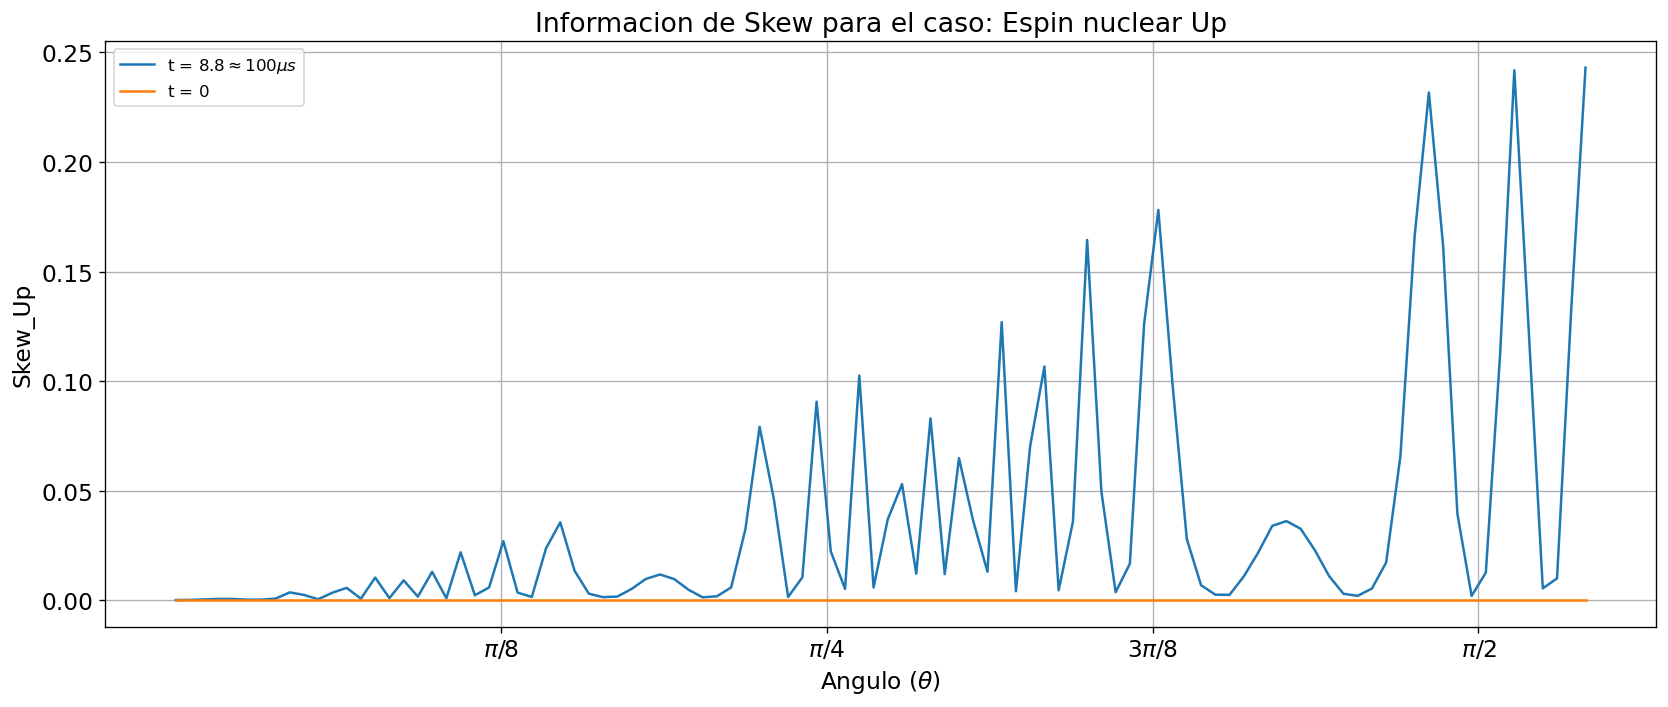

In [26]:
plt.figure(figsize = (14,6))
plt.title(r'Informacion de Skew para el caso: Espin nuclear Up', fontsize = 16 )

#plt.plot(anglelist,Sk_up.real, label= r't = $50 \approx 568 \mu s$', linewidth=1.5)
#plt.plot(anglelist,Sk2_up.real, label= r't = $35 \approx 398 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk1_up.real, label= r't = $25 \approx 284 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk2_up.real, label= r't = $15 \approx 170 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk3_up.real, label= r't = $12.5  \approx 142  \mu s$'   , linewidth=1.5)
#plt.plot(anglelist,Sk4_up.real, label= r't = $10.5  \approx 119  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk5_up.real, label= r't = $9  \approx 102  \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Sk6_up.real, label= r't = $8.8  \approx 100  \mu s$', linewidth=1.5)
#plt.plot(anglelist,Sk7_up.real, label= r't = $8.75  \approx 99.5  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk8_up.real, label= r't = $5  \approx 56  \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Sk9_up.real, label= r't = $0$' , linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_Up', fontsize = 14)
plt.legend()

plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.legend()

        
plt.tight_layout()


plt.savefig('Espin_Nuclear_UP_aprox1_Skew_104_up.png', dpi=500)
plt.show()

In [27]:
Fisher1_up = []; Fisher2_up = []; Fisher3_up = []; Fisher4_up = []; Fisher5_up = [];  Fisher6_up = []; Fisher7_up = []; Fisher8_up = []; Fisher9_up = [];

In [28]:
Fisher1_up = CalcularFisherUp(anglelist,ro,499)
Fi1_up = np.array(Fisher1_up)
####################################################
Fisher6_up = CalcularFisherUp(anglelist,ro,175)
Fi6_up = np.array(Fisher6_up )
##################################################
Fisher8_up = CalcularFisherUp(anglelist,ro,99)
Fi8_up = np.array(Fisher8_up )

In [29]:
##################################################
Fisher9_up = CalcularFisherUp(anglelist,ro,0)
Fi9_up = np.array(Fisher9_up )

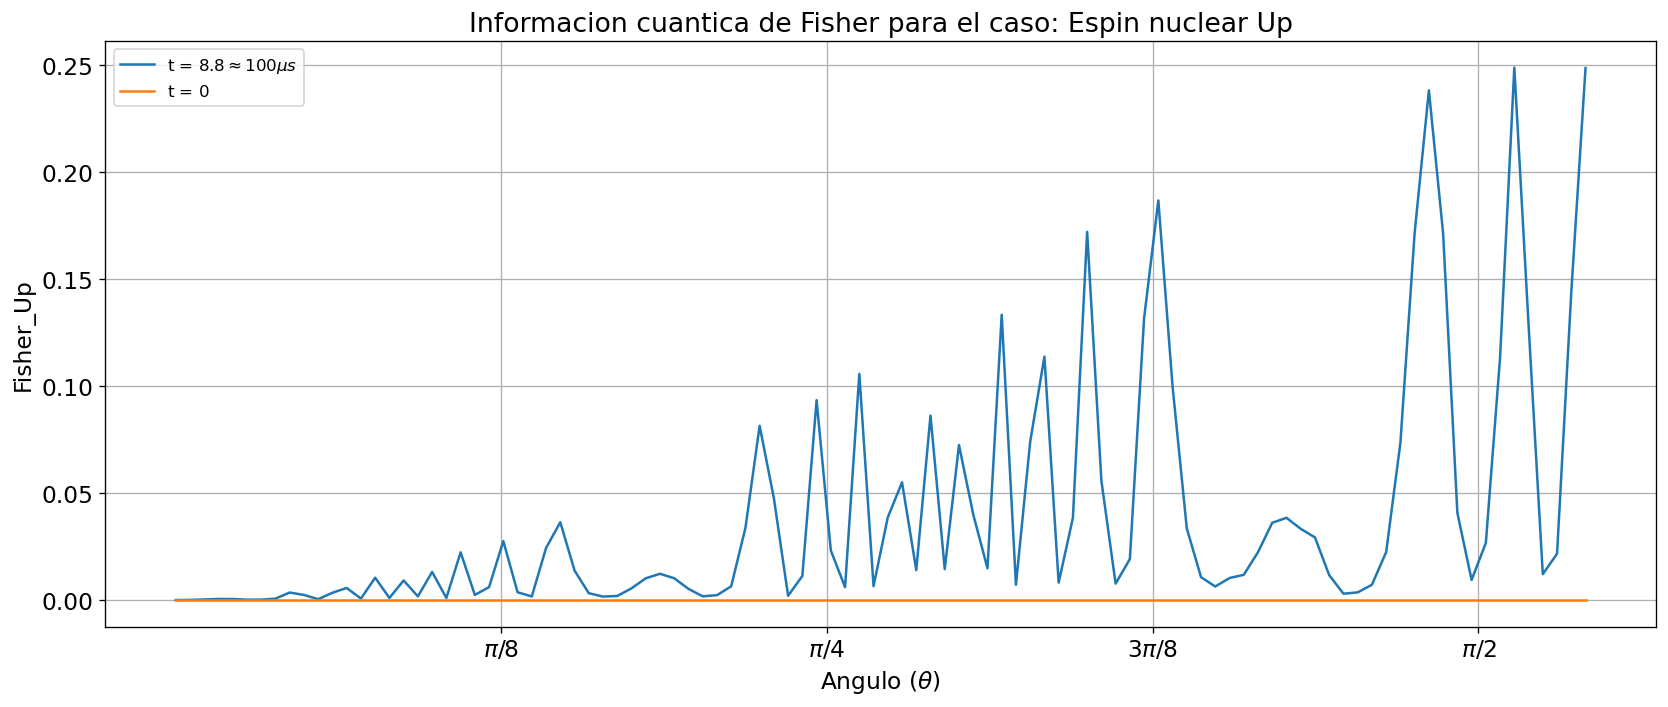

In [30]:
plt.figure(figsize = (14,6))

plt.title(r'Informacion cuantica de Fisher para el caso: Espin nuclear Up', fontsize = 16 )
#plt.plot(anglelist,Fi_up.real , label=r't = $50 \approx 568 \mu s$', linewidth=1.5)
#plt.plot(anglelist,Fi1_up.real, label=r't = $25 \approx 284 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Fi2_up.real, label=r't = $15 \approx 170 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Fi3_up.real, label=r't = $12.5  \approx 142  \mu s$'   , linewidth=1.5)
#plt.plot(anglelist,Fi4_up.real, label=r't = $10.5  \approx 119  \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Fi5_up.real, label=r't = $9  \approx 102  \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Fi6_up.real, label=r't = $8.8  \approx 100  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Fi7_up.real, label=r't = $8.75  \approx 99.5  \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Fi8_up.real, label=r't = $5  \approx 56  \mu s$' , linewidth=1.5)
plt.plot(anglelist,Fi9_up.real, label=r't = $0$'  , linewidth=1.5)
 
plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Fisher_Up', fontsize = 14)
plt.legend()
 
plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.tight_layout()

plt.savefig('Espin_Up_Fisher_up_Distintos_tiempos.png', dpi=500)
plt.show()

In [31]:
def CalcularSkewTiempo(NumAngulo,ro,numGuardar1):
        Skew = [] # Lista donde se guardaran la informacion de skew de cada matriz de densidad  
        evals11, ekets11 =ro[NumAngulo][numGuardar1].eigenstates()  # Obtener los eigenestados de la matriz de densidad ro[p]
        SX_base_rho = (SX.transform(ekets11))   # Hacer el cambio de base de Sx a la base de la matriz de densidad
        SY_base_rho = (SY.transform(ekets11))   # Hacer el cambio de base de Sy a la base de la matriz de densidad
        SZ_base_rho = (SZ.transform(ekets11))   # Hacer el cambio de base de Sz a la base de la matriz de densidad
        roDiagonal = (ro[NumAngulo][numGuardar1].transform(ekets11))# Diagonalizar la matriz de densidad
        roDiagonalRaiz = qt.Qobj(np.sqrt(roDiagonal))# Obtener la razi de la matriz de densidad diagonalizada 
        g = [] # Lista donde se guardaran los elementos de la matriz W
        SigmasBaseRho = [SX_base_rho, SY_base_rho, SZ_base_rho] # Lista de los operadores Sx,Sy,Sz
        for i in range(0,3):
            for j in range(0,3):  
                A = roDiagonalRaiz*(qt.Qobj(SigmasBaseRho[i].data.toarray(),dims=[[4],[4]])) # \sqrt{\rho_{AB}} (\sigma_{iA} \otimes I_{B} )
                B = roDiagonalRaiz*(qt.Qobj(SigmasBaseRho[j].data.toarray(),dims=[[4],[4]]))  # \sqrt{\rho_{AB}}  (\sigma_{jA} \otimes I_{B} )
                AB = A*B 
                g.append( AB.tr() )  # Elemento de la matriz ij
        Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2] ] # Construir la matriz W 
                                                ,[g[3]  , g[4]  , g[5] ]
                                                ,[g[6]  , g[7]  , g[8] ]]))
        evals1, ekets1 =Matriz_W_A1.eigenstates() #Obtener los eigenestados de la matriz W
        Skew.append(1-np.amax(evals1)) # Obtener la informacion de Skew
        return Skew 

In [50]:
SkewTiempo=[]
for jj in range(0,1000): 
    SkewTiempo.append(CalcularSkewTiempo(0,ro,jj))

In [51]:
SkewTiempo[0]

[0.0]

In [52]:
Sk1_T = np.array(SkewTiempo)

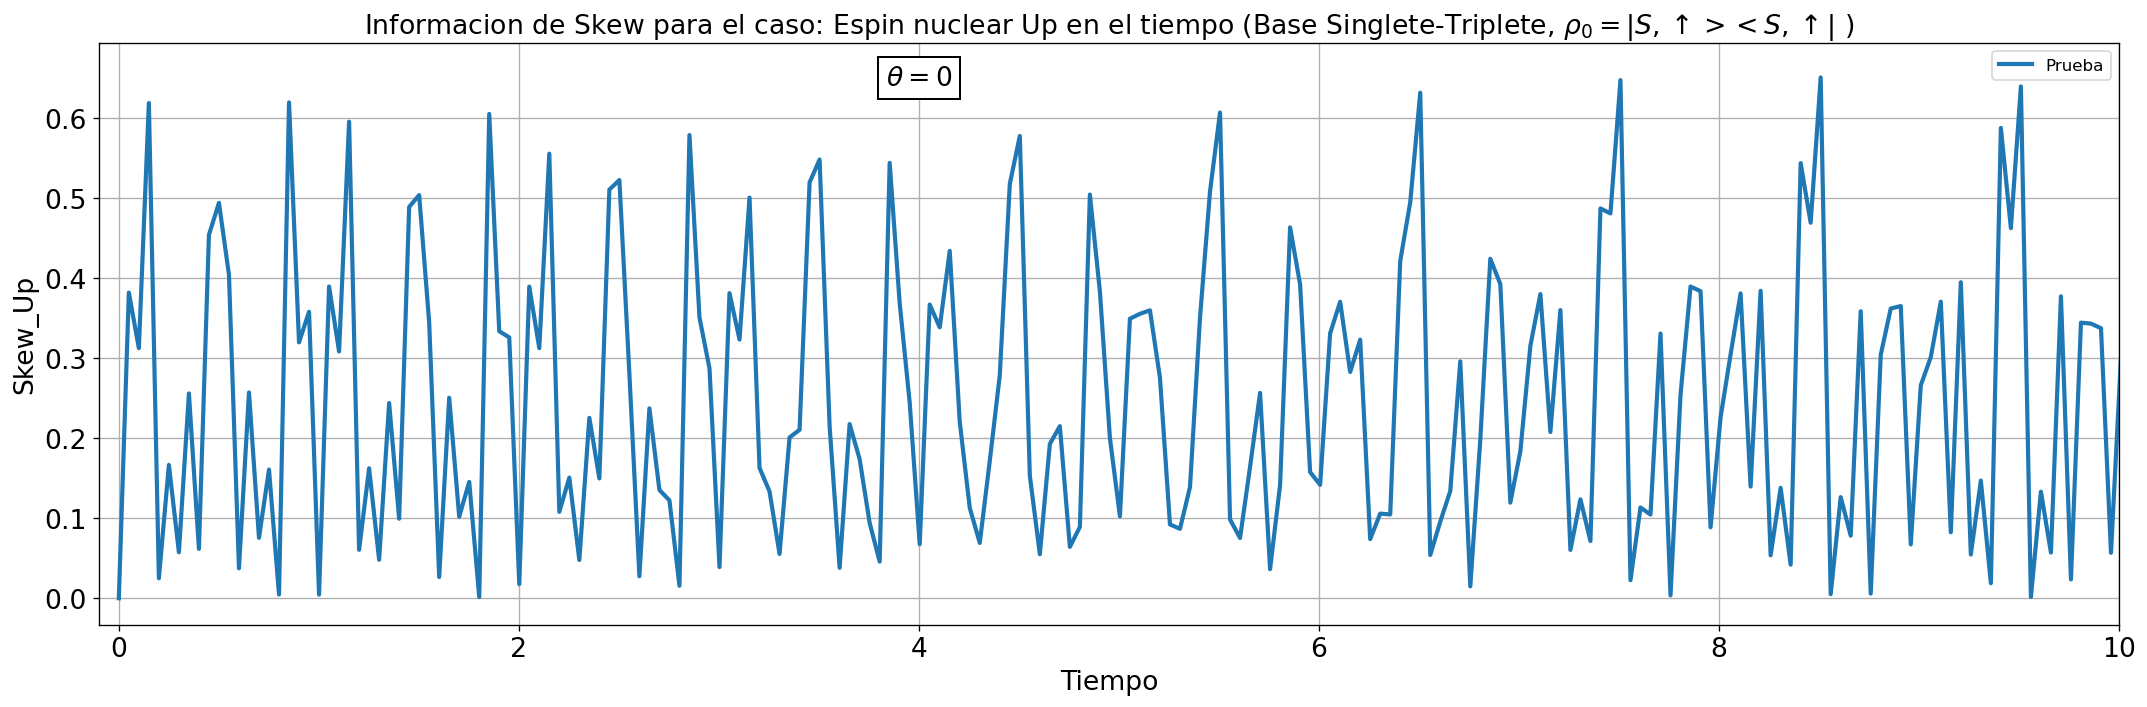

In [68]:
plt.figure(figsize = (18,6))
plt.title(r'Informacion de Skew para el caso: Espin nuclear Up en el tiempo (Base Singlete-Triplete, $\rho_{0} = |S,\uparrow> <S, \uparrow|$ )', fontsize = 16 )

plt.plot(t,Sk1_T.real, label= r'Prueba' , linewidth=2.5)

plt.grid()
plt.xlabel('Tiempo', fontsize = 16)
plt.ylabel('Skew_Up', fontsize = 16)
plt.legend()

plt.xlim(-0.1,10.0)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
#plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
#           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.legend()
plt.text( 4 , 0.65 , r'$\theta =0$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #\frac{\pi}{4}
        
plt.tight_layout()


plt.savefig('Zoom_Tiempo_Skew_0_ST_Espin_Nuclear_UP.png', dpi=500)
plt.show()

In [54]:
def CalcularFisherTiempo(NumAngulo,ro,numGuardar1):
        Fisher= [] #Lista donde se guardara la informacion de Fisher para cada matriz de densidad
        evals11, ekets11 =ro[NumAngulo][numGuardar1].eigenstates() # Obtener los eigenestados de la matriz de densidad ro[p]
        SX_base_rho = (SX.transform(ekets11))  # Hacer el cambio de base de Sx a la base de la matriz de densidad
        SY_base_rho = (SY.transform(ekets11))  # Hacer el cambio de base de Sy a la base de la matriz de densidad
        SZ_base_rho = (SZ.transform(ekets11))  # Hacer el cambio de base de Sz a la base de la matriz de densidad
        SigmasBaseRho = [SX_base_rho, SY_base_rho, SZ_base_rho] # Lista de los operadores Sx,Sy,Sz
        g11=[] #Lista donde se guardara los valores para obtener el elemento de matriz W11
        g12=[] # "                                                                "  W12
        g13=[]
        g21=[]
        g22=[]
        g23=[]
        g31=[]
        g32=[]
        g33=[]
        g11 = Calcular_elemento(SigmasBaseRho,evals11,0,0) # Calcula los valores para obtener el elemento W11
        g12 = Calcular_elemento(SigmasBaseRho,evals11,0,1) # Calcula los valores para obtener el elemento W12
        g13 = Calcular_elemento(SigmasBaseRho,evals11,0,2) # Calcula los valores para obtener el elemento W13
        g21 = Calcular_elemento(SigmasBaseRho,evals11,1,0) # "                                           " W21
        g22 = Calcular_elemento(SigmasBaseRho,evals11,1,1) # "                                           " W22
        g23 = Calcular_elemento(SigmasBaseRho,evals11,1,2) # "                                           " W23
        g31 = Calcular_elemento(SigmasBaseRho,evals11,2,0) # "                                           " W31
        g32 = Calcular_elemento(SigmasBaseRho,evals11,2,1) # "                                           " W32
        g33 = Calcular_elemento(SigmasBaseRho,evals11,2,2)# "                                            " W33
        W11 = np.sum(g11)/2 # Se hace la suma para obtener el elmento de matirz W11           
        W12 = np.sum(g12)/2 # "                                             " W12           
        W13 = np.sum(g13)/2 # "                                             " W13  
        W21 = np.sum(g21)/2 # "                                             " W21            
        W22 = np.sum(g22)/2 # "                                             " W22           
        W23 = np.sum(g23)/2 # "                                             " W23           
        W31 = np.sum(g31)/2 # "                                             " W31
        W32 = np.sum(g32)/2 # "                                             " W32
        W33 = np.sum(g33)/2# "                                             " W33
        Matriz_W_A1 = qt.Qobj(np.matrix([[W11  , W12  , W13 ] # Construir la matriz W 
                                                ,[W21  , W22  , W23 ]
                                                ,[W31  , W32  , W33 ]]))
        evals1, ekets1 =Matriz_W_A1.eigenstates() #Obtener los eigenestados de la matriz W
        Fisher.append(np.amin(evals1))  # Obtener la informacion de Fisher
        return Fisher

In [70]:
FisherTiempo=[]
for jj in range(0,1000): 
    FisherTiempo.append(CalcularFisherTiempo(0,ro,jj))

In [71]:
FisherTiempo[0]

[0.0]

In [72]:
Fi1_T = np.array(FisherTiempo)

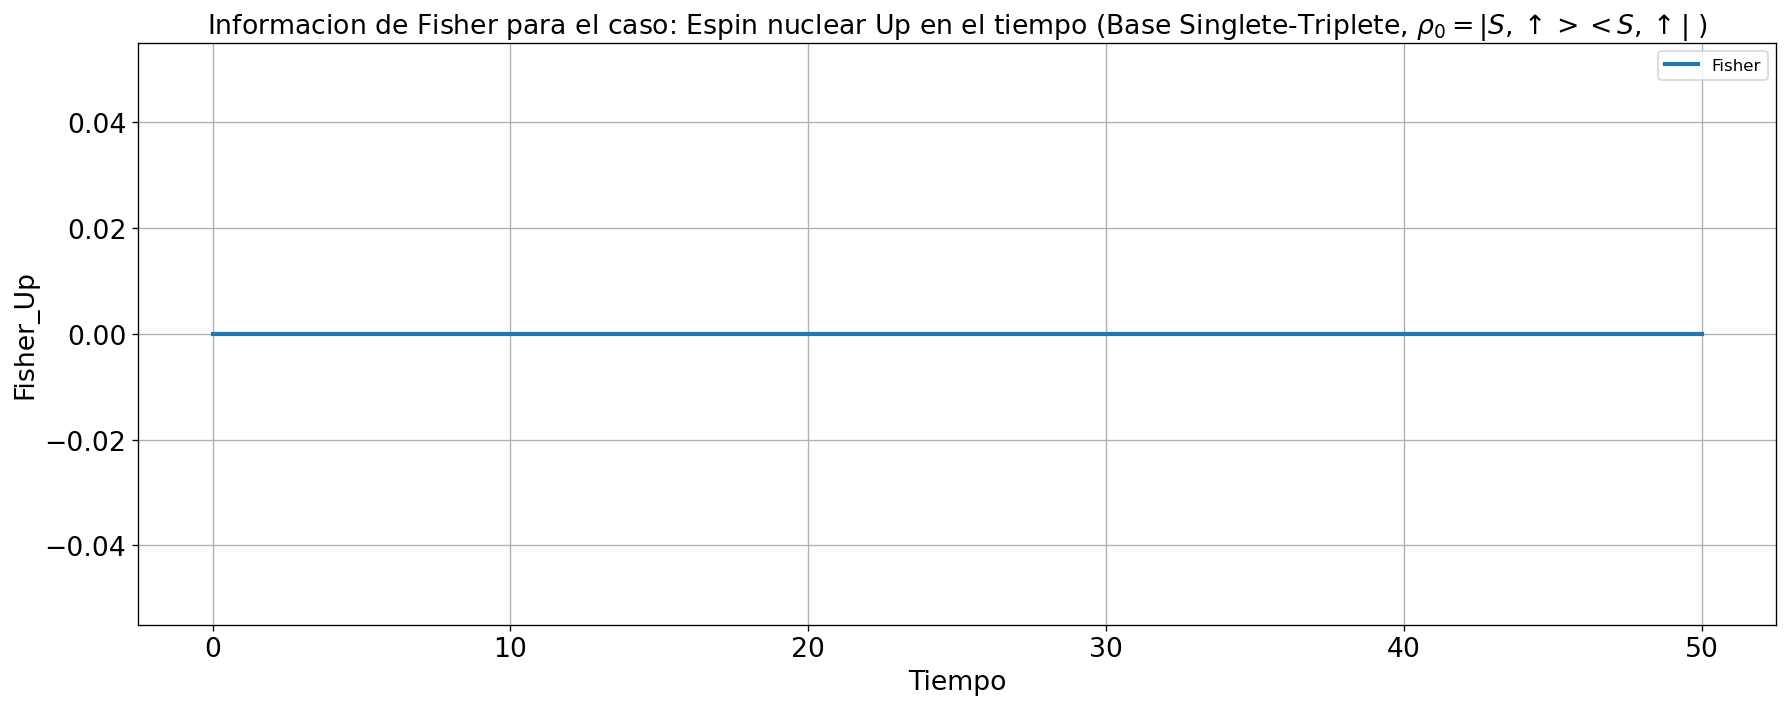

In [74]:
plt.figure(figsize = (15,6))
plt.title(r'Informacion de Fisher para el caso: Espin nuclear Up en el tiempo (Base Singlete-Triplete, $\rho_{0} = |S,\uparrow> <S, \uparrow|$ )', fontsize = 16 )

plt.plot(t,FisherTiempo, label= r'Fisher' , linewidth=2.5)

plt.grid()
plt.xlabel('Tiempo', fontsize = 16)
plt.ylabel('Fisher_Up', fontsize = 16)
plt.legend()
#plt.xlim(-0.1,10.0)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
#plt.text( 4, 0.65, r'$\theta = 0$', ha="center", va="center", size=16, 
 #   bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2))#\frac{\pi}{4}
plt.legend()

plt.tight_layout()

plt.savefig('Zoom_Tiempo_Fisher_0_ST_Espin_Nuclear_UP.png', dpi=500)
plt.show()

In [59]:
#Concu = []; # Lista donde se guarda la concurrencia para cada ro

In [42]:
#for ii in range(0,len(Plist)):
 #   Concu.append(qt.concurrence(qt.Qobj(ro[ii].data.toarray(),dims=[[2, 2], [2, 2]]))) # Calcular la concurrencia para cada ro

In [43]:
time.time() - start_time

121.12616872787476